# Assignment 2
### Ostapovich Oleg
Link to data for task 2: https://drive.google.com/file/d/1j2eNAL0hedz1C5iHx-b6ufmoA-5bXofB/view?usp=share_link

In [1326]:
import matplotlib.pyplot as plt
import numpy as np

# Task 1

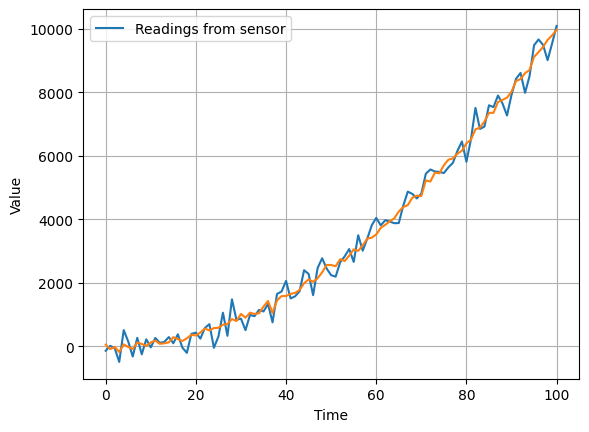

In [1327]:
N = 100
muPsi, sigmaPsi = 0, 80     # mean and standard deviation that describe the motion model error
muEta, sigmaEta = 0, 300     # mean and standard deviation that describe the sensor error
errorPsi = np.random.normal(muPsi, sigmaPsi, N+1)   # pdf of the motion model error
errorEta = np.random.normal(muEta, sigmaEta, N+1)   # pdf of the sensor error

a = 1
# function
time = np.linspace(0, 100, N+1)
x = a * time**2 + errorPsi
z = x + errorEta
# plotting
plt.plot(time, z, label='Readings from sensor')
plt.plot(time, x)
plt.ylabel('Value')
plt.xlabel('Time')
# plt.axis([-10, 110, 0, 150])
plt.grid(True)
plt.legend()
plt.show()

In [1328]:
class KalmanFilter(object):
    def __init__(self, dt, u, std_acc, std_meas):
        self.dt = dt
        self.u = u
        self.std_acc = std_acc
        self.A = np.matrix([[1, self.dt],
                            [0, 1]])
        self.B = np.matrix([[(self.dt**2)/2], [self.dt]])
        self.H = np.matrix([[1,0]])
        self.Q = np.matrix([[(self.dt**4)/4, (self.dt**3)/2],
                            [(self.dt**3)/2, self.dt**2]]) * self.std_acc**2
        self.R = std_meas**2
        self.P = np.eye(self.A.shape[1])
        self.x = np.matrix([[0],[0]])

    def predict(self):

        # Update time state
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.u)

        # Calculate error covariance

        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x

    def update(self, z):


        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R

        # Calculate the Kalman Gain

        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))

        self.x = np.round(self.x + np.dot(K, (z - np.dot(self.H, self.x))))

        I = np.eye(self.H.shape[1])
        self.P = (I - (K * self.H)) * self.P


In [1329]:
# 1D Kalman Filter
dt = 1
t = np.linspace(1, 100, N+1)
# Define a model track
u= 2
std_acc = 0.25
std_meas = 1.2
# create KalmanFilter object
kf = KalmanFilter(dt, u, std_acc, std_meas)
predictions = []
measurements = []
for j in z:
    z_ = kf.H * j + np.random.normal(0, 50)
    measurements.append(z_.item(0))
    predictions.append(kf.predict()[0])
    kf.update(z_.item(0))

In [1330]:
# Recursive filter
eOpt = np.zeros(N+1)
K    = np.zeros(N+1)
xOpt = np.zeros(N+1)
# simplified Kalman filter
for t in range(N):
    eOpt[t+1] = np.sqrt((0.1*sigmaEta**2) * (eOpt[t]**2 + 0.1*sigmaPsi**2)/(0.1*sigmaEta**2 + eOpt[t]**2 + 0.1*sigmaPsi**2))
    K[t+1] = (eOpt[t+1]**2)/(0.1*sigmaEta**2) # Kalman coeff
    xOpt[t+1] = (xOpt[t]+a*t) * (1-K[t+1]) + K[t+1]*z[t+1]

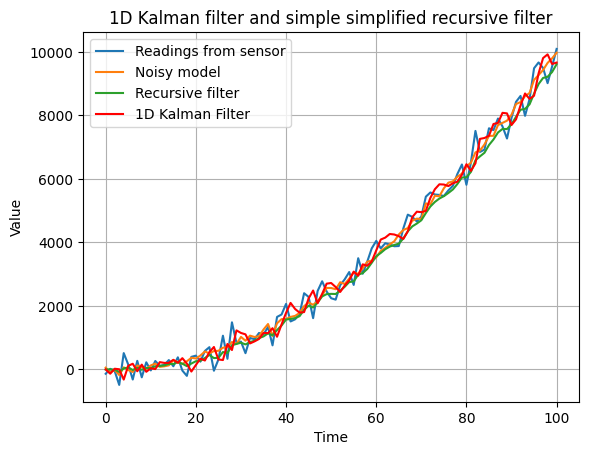

In [1331]:
plt.title('1D Kalman filter and simple simplified recursive filter')
plt.plot(time, z, label='Readings from sensor')
plt.plot(time, x, label='Noisy model')
plt.plot(time, xOpt, label='Recursive filter')
plt.plot(time, np.squeeze(predictions), label='1D Kalman Filter', color='r')
plt.ylabel('Value')
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.show()

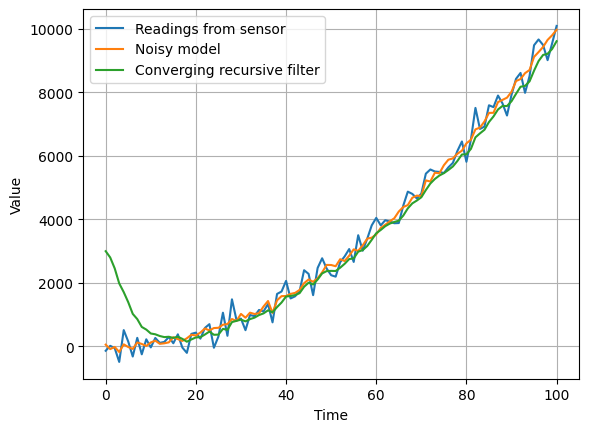

In [1332]:
# Playing with different initial values for simplified Kalman filter
eOpt = np.zeros(N+1)
K    = np.zeros(N+1)
xOpt = np.zeros(N+1)
xOpt[0] = 3000
# simplified Kalman filter
for t in range(N):
    eOpt[t+1] = np.sqrt((0.1*sigmaEta**2) * (eOpt[t]**2 + 0.1*sigmaPsi**2)/(0.1*sigmaEta**2 + eOpt[t]**2 + 0.1*sigmaPsi**2))
    K[t+1] = (eOpt[t+1]**2)/(0.1*sigmaEta**2) # Kalman coeff
    xOpt[t+1] = (xOpt[t]+a*t) * (1-K[t+1]) + K[t+1]*z[t+1]
plt.plot(time, z, label='Readings from sensor')
plt.plot(time, x, label='Noisy model')
plt.plot(time, xOpt, label='Converging recursive filter')
plt.ylabel('Value')
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.show()

As we can see here, Kalman filter is converging with sensor readings

# Task 2

Link to data: https://drive.google.com/file/d/1j2eNAL0hedz1C5iHx-b6ufmoA-5bXofB/view?usp=share_link

In [1333]:
import pandas as pd
# data = pd.read_csv('data/2022-11-1715.28.18.csv', sep=';')
data = pd.read_csv('data/2022-11-1715.35.16.csv', sep=';')
data.drop('Unnamed: 7', axis=1, inplace=True)
data.replace(to_replace=',', value='.', regex=True, inplace=True)
data = data.astype(float) # convert str to float
time = data['time'] # get time
# data.drop_duplicates(inplace=True)
data.drop(index=0, inplace=True) # dropping first empty line
data.drop('time', axis=1, inplace=True)
Lat_Lon = np.array(data.iloc[:,3:5]) # matrix where Latitude and Longitude stored

In [1339]:
data.head()

,ax,ay,az,Latitude,Longitude,Speed (m/s)
1,0.0,0.0,0.0,55.747018,48.74276,0.0
2,0.0,0.0,0.0,55.747018,48.74276,0.0
3,0.0,0.0,0.0,55.747018,48.74276,0.0
4,0.0,0.0,0.0,55.747018,48.74276,0.0
5,0.0,0.0,0.0,55.747018,48.74276,0.0


In [1335]:
from geopy.distance import great_circle
distances = []

for i in range(len(Lat_Lon[:-1,0])):
    distances.append(great_circle(Lat_Lon[i],Lat_Lon[i+1]).meters) # calculate distances between points

print('Starting dimensions: ', len(distances), time.shape)
indexes = []
for i, j in enumerate(distances):
    if j == 0:
        indexes.append(i) # detect zeros

distances = np.delete(distances, indexes) # delete zeros
distances = distances.cumsum() # every element is a sum of previous
time = np.delete(time.tolist(), indexes) # delete time values that have no march with distances
print('Dimensions after removing zeros: ', distances.shape, time.shape)

Starting dimensions:  26195 (26197,)
Dimensions after removing zeros:  (322,) (324,)


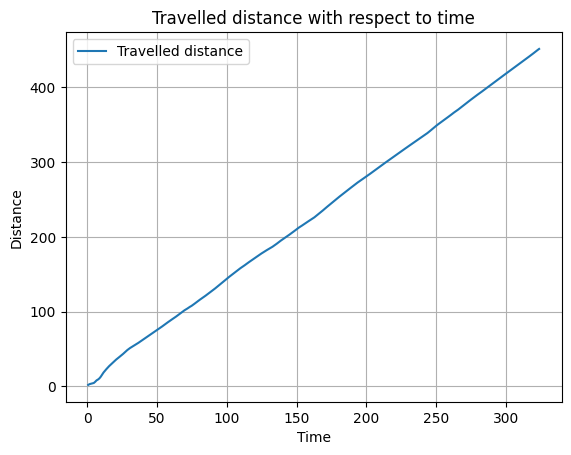

In [1336]:
# distances = distances + np.random.normal(0,50,len(distances))
plt.title('Travelled distance with respect to time')
plt.plot(time[:-2], distances, label='Travelled distance')
plt.ylabel('Distance')
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.show()

In [1337]:
dt = time.max()/len(time) # almost 1
# Define a model track
u= 2

std_acc = 10
std_meas = 100
# create KalmanFilter object
kf = KalmanFilter(dt, u, std_acc, std_meas)
predictions = []
measurements = []
for j in distances:
    z_ = kf.H * j + np.random.normal(0, 50)
    measurements.append(z_.item(0))
    predictions.append(kf.predict()[0])
    kf.update(z_.item(0))

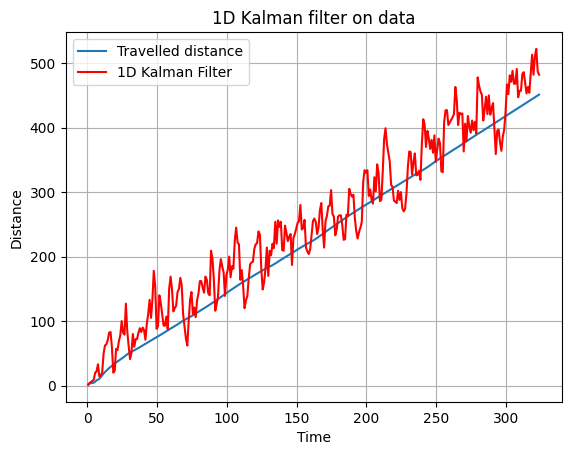

In [1338]:
plt.title('1D Kalman filter on data')
plt.plot(time[:-2], distances, label='Travelled distance')
plt.plot(time[:-2], np.squeeze(predictions), label='1D Kalman Filter', color='r')
plt.ylabel('Distance')
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.show()